# Credit Risk Modelling

## Buisness problem statement

The most important function of a bank is to accept deposits and provide loans using it. Bank attracts Credit risk by lending loans to its customers where Credit Risk is the probability of the counterparty defaulting on its loan. So it a pivotal function of a bank to seggregate the customers into good and bad credit applicants. So here, with the past year data, we'll classify the credit applicants using the ML algorithms. 

## Data source

Kaggle : Link,
https://www.kaggle.com/datasets/laotse/credit-risk-dataset

## Data variables

Annual Income, Home ownership, Employment length (in years), Loan intent, Loan grade, Loan amount, Interest rate, Loan status(0 is on default 1 is default), Loan amount, Percent Income, History default and Credit Length History

## Model Evaluation on test data (Accuracy)

# Code

Intializing the packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import tree
import matplotlib.pyplot as plt


Intializing the dataset

In [6]:
df1=pd.read_csv(r"C:\Users\Naveen S R\Downloads\archive (2)\credit_risk_dataset.csv")

In [7]:
df=df1

In [8]:
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [9]:
df1.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [11]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Data Preprocessing

Creating dummy variables for the categorical data features

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [17]:
df1['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [663]:
for i in df1.columns:
    if df1[i].dtype == 'object':
        df1[i] = pd.Categorical(df1[i]).codes

In [664]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int8   
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  int8   
 5   loan_grade                  32581 non-null  int8   
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int8   
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), int8(4)
memory usage: 2.1 MB


In [18]:
df1 = pd.get_dummies(df1 , columns = ['person_home_ownership' ,'loan_intent','loan_grade','cb_person_default_on_file'])

In [68]:
df1.head() 

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,0.59,3,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.0,1000,11.14,0.10,2,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,0.57,3,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,0.53,2,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,0.55,4,False,False,False,...,False,False,False,True,False,False,False,False,False,True


array([1, 0], dtype=int64)

Treatment of the null values

In [20]:
df1.isnull().sum()

person_age                           0
person_income                        0
person_emp_length                  895
loan_amnt                            0
loan_int_rate                     3116
loan_status                          0
loan_percent_income                  0
cb_person_cred_hist_length           0
person_home_ownership_MORTGAGE       0
person_home_ownership_OTHER          0
person_home_ownership_OWN            0
person_home_ownership_RENT           0
loan_intent_DEBTCONSOLIDATION        0
loan_intent_EDUCATION                0
loan_intent_HOMEIMPROVEMENT          0
loan_intent_MEDICAL                  0
loan_intent_PERSONAL                 0
loan_intent_VENTURE                  0
loan_grade_A                         0
loan_grade_B                         0
loan_grade_C                         0
loan_grade_D                         0
loan_grade_E                         0
loan_grade_F                         0
loan_grade_G                         0
cb_person_default_on_file

In [22]:
df1=df1.dropna()

In [31]:
df1.drop_duplicates(inplace=True)

In [32]:
df1_target=df1.pop('loan_status')

In [33]:
df1.shape

(28501, 26)

Standarding the data 

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df1)

Splitting the data into train and test

In [35]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(df1,df1_target,test_size=0.3,random_state=1)

Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc, roc_curve
confusion_matrix(y_train,y_train_pred)

array([[15554,    87],
       [ 1330,  2979]], dtype=int64)

In [62]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     15641
           1       0.97      0.69      0.81      4309

    accuracy                           0.93     19950
   macro avg       0.95      0.84      0.88     19950
weighted avg       0.93      0.93      0.92     19950



In [63]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6672
           1       0.97      0.68      0.80      1879

    accuracy                           0.93      8551
   macro avg       0.94      0.84      0.88      8551
weighted avg       0.93      0.93      0.92      8551



In [112]:
y_predict_proba=lr.predict_proba(x_test)
y_predict_proba

array([[0.93626796, 0.06373204],
       [0.65754242, 0.34245758],
       [0.96200361, 0.03799639],
       ...,
       [0.81812777, 0.18187223],
       [0.54970987, 0.45029013],
       [0.62635973, 0.37364027]])

In [113]:
fpr, tpr, thresholds = roc_curve(y_test,y_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

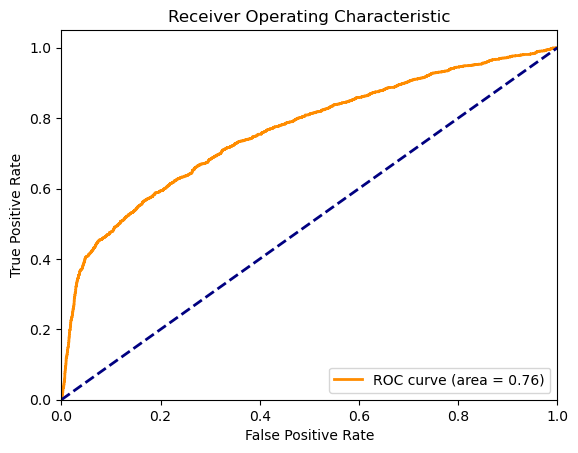

In [114]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier
dts=DecisionTreeClassifier(criterion='gini',
                                           max_depth = 10,
                                           min_samples_leaf=25,
                                           min_samples_split=75)
dts.fit(x_train,y_train)
y_train_pred=dts.predict(x_train)
y_test_pred=dts.predict(x_test)


In [85]:
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

           0       0.92      0.99      0.96     15641
           1       0.95      0.71      0.81      4309

    accuracy                           0.93     19950
   macro avg       0.94      0.85      0.88     19950
weighted avg       0.93      0.93      0.93     19950



In [116]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      6672
           1       0.96      0.70      0.81      1879

    accuracy                           0.93      8551
   macro avg       0.94      0.85      0.88      8551
weighted avg       0.93      0.93      0.92      8551



In [117]:
y_predict_proba=dts.predict_proba(x_test)
y_predict_proba

array([[0.93810787, 0.06189213],
       [0.88413793, 0.11586207],
       [0.97695853, 0.02304147],
       ...,
       [0.88413793, 0.11586207],
       [0.        , 1.        ],
       [0.94668346, 0.05331654]])

In [118]:
fpr, tpr, thresholds = roc_curve(y_test,y_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

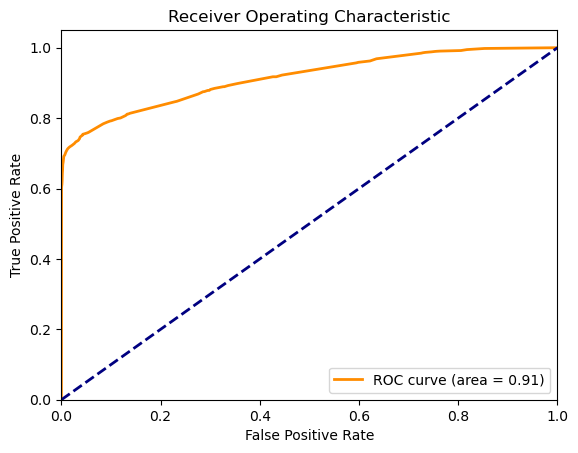

In [119]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

KNeighorsClassifier

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn=KNeighborsClassifier()

In [122]:
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)


In [123]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     15641
           1       0.78      0.60      0.67      4309

    accuracy                           0.88     19950
   macro avg       0.84      0.77      0.80     19950
weighted avg       0.87      0.88      0.87     19950



In [124]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6672
           1       0.65      0.49      0.56      1879

    accuracy                           0.83      8551
   macro avg       0.76      0.71      0.73      8551
weighted avg       0.82      0.83      0.82      8551



In [125]:
y_predict_proba=knn.predict_proba(x_test)
y_predict_proba

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2]])

In [127]:
fpr, tpr, thresholds = roc_curve(y_test,y_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

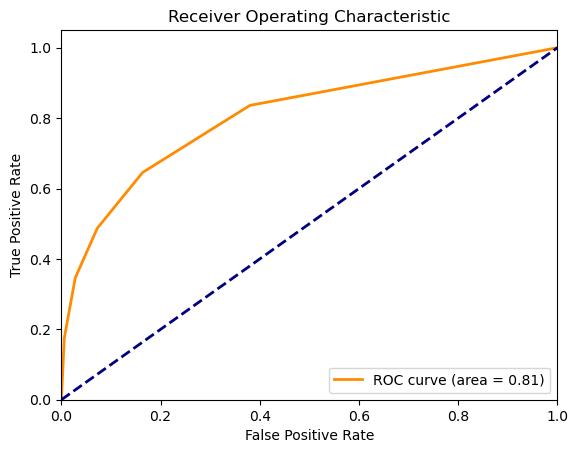

In [128]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Random Forest 

In [129]:
from sklearn.ensemble import RandomForestClassifier as RF


In [130]:
rf=RF(n_estimators=100,max_depth = 10,
                                           min_samples_leaf=25,
                                           min_samples_split=75)

In [131]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=75)

In [132]:
y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)

In [133]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15641
           1       0.98      0.69      0.81      4309

    accuracy                           0.93     19950
   macro avg       0.95      0.84      0.88     19950
weighted avg       0.93      0.93      0.92     19950



In [134]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6672
           1       0.97      0.67      0.79      1879

    accuracy                           0.92      8551
   macro avg       0.94      0.83      0.87      8551
weighted avg       0.93      0.92      0.92      8551



In [136]:
y_predict_proba=knn.predict_proba(x_test)
y_predict_proba

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2]])

In [137]:
fpr, tpr, thresholds = roc_curve(y_test,y_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

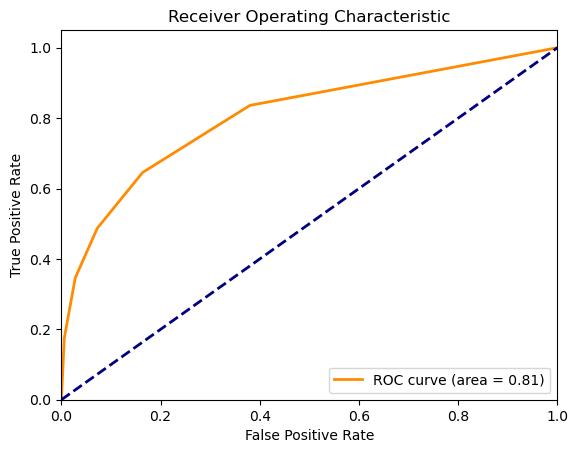

In [138]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()